# Basic Epidemiology Models

In [1]:
using AlgebraicPetri
using AlgebraicPetri.Epidemiology

using LabelledArrays
using OrdinaryDiffEq
using Plots

using Catlab
using Catlab.Graphics
using Catlab.WiringDiagrams
using Catlab.CategoricalAlgebra
using Catlab.Programs.RelationalPrograms

display_uwd(ex) = to_graphviz(ex, box_labels=:name, junction_labels=:variable, edge_attrs=Dict(:len=>".75"));

#### SIR Model:

define model

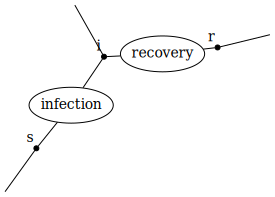

In [2]:
sir = @relation (s,i,r) begin
    infection(s,i)
    recovery(i,r)
end
display_uwd(sir)

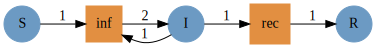

In [3]:
p_sir = apex(oapply_epi(sir))
to_graphviz(p_sir)

define initial states and transition rates, then
create, solve, and visualize ODE problem

In [4]:
u0 = LVector(S=10, I=1, R=0);
p = LVector(inf=0.4, rec=0.4);

The C-Set representation has direct support for generating a DiffEq vector field

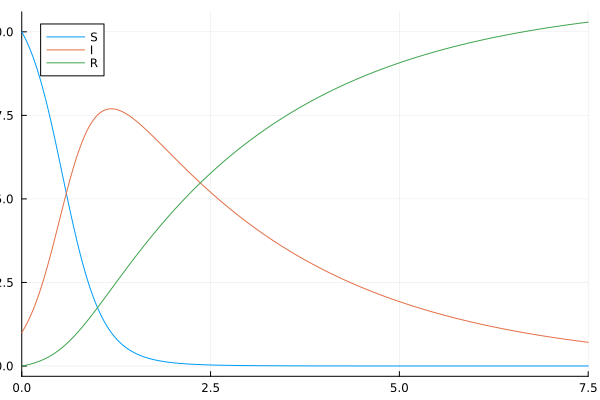

In [5]:
prob = ODEProblem(vectorfield(p_sir),u0,(0.0,7.5),p);
sol = solve(prob,Tsit5())

plot(sol)

#### SEIR Model:

define model

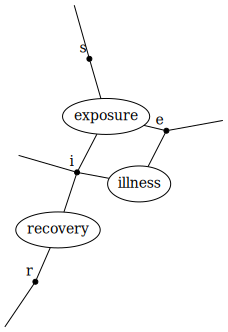

In [6]:
seir = @relation (s,e,i,r) begin
    exposure(s,i,e)
    illness(e,i)
    recovery(i,r)
end
display_uwd(seir)

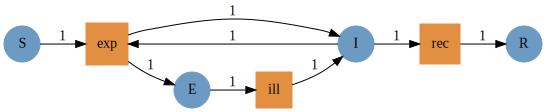

In [7]:
p_seir = apex(oapply_epi(seir))
to_graphviz(p_seir)

define initial states and transition rates, then
create, solve, and visualize ODE problem

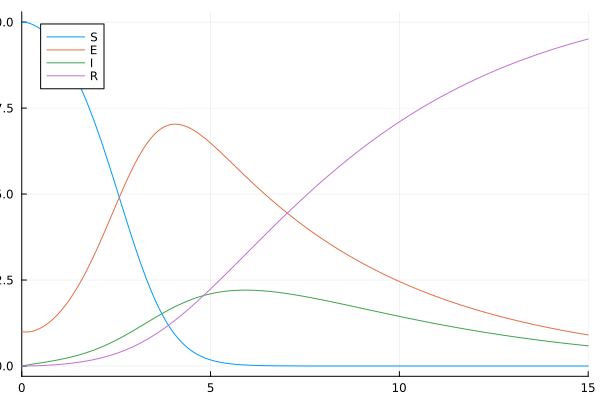

In [8]:
u0 = LVector(S=10, E=1, I=0, R=0);
p = LVector(exp=.9, ill=.2, rec=.5);

prob = ODEProblem(vectorfield(p_seir),u0,(0.0,15.0),p);
sol = solve(prob,Tsit5())

plot(sol)

#### SEIRD Model:

define model

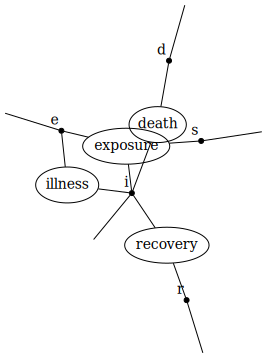

In [9]:
seird = @relation (s,e,i,r,d) begin
    exposure(s,i,e)
    illness(e,i)
    recovery(i,r)
    death(i,d)
end
display_uwd(seird)

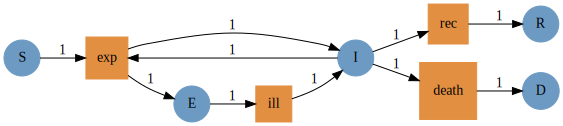

In [10]:
p_seird = apex(oapply_epi(seird))
to_graphviz(p_seird)

define initial states and transition rates, then
create, solve, and visualize ODE problem

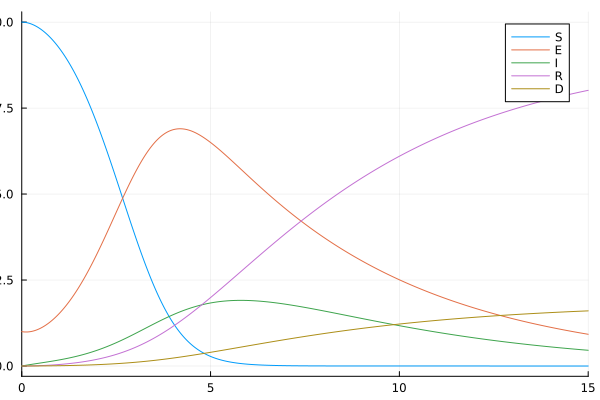

In [11]:
u0 = LVector(S=10, E=1, I=0, R=0, D=0);
p = LVector(exp=0.9, ill=0.2, rec=0.5, death=0.1);

prob = ODEProblem(vectorfield(p_seird),u0,(0.0,15.0),p);
sol = solve(prob,Tsit5())

plot(sol)